In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats as stats

# Read the JSON file into a Pandas DataFrame
df = pd.read_json('C:/Users/samme/Downloads/Yelp_academic_dataset_round8/'
                  'Yelp_academic_dataset_round8/yelp_academic_dataset_business.json',
                  lines=True)

In [2]:
# Printing head of dataframe
df.head(3)

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,5UmKMjUEUNdYWqANhGckJw,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",True,"[Fast Food, Restaurants]",Dravosburg,7,Mr Hoagie,[],-79.900706,PA,3.5,40.354327,"{'Take-out': True, 'Drive-Thru': False, 'Good ...",business
1,UsFtqoBl7naz8AVUBZMjQQ,"202 McClure St\nDravosburg, PA 15034",{},True,[Nightlife],Dravosburg,5,Clancy's Pub,[],-79.886814,PA,3.0,40.350553,"{'Happy Hour': True, 'Accepts Credit Cards': T...",business
2,cE27W9VPgO88Qxe4ol6y_g,"1530 Hamilton Rd\nBethel Park, PA 15234",{},False,"[Active Life, Mini Golf, Golf]",Bethel Park,5,Cool Springs Golf Center,[],-80.014660,PA,2.5,40.354115,{'Good for Kids': True},business


In [3]:
# Creating a dataframe for entries that contain the keyword Restaurants
restaurant_df = df[df['categories'].apply(lambda x: 'Restaurants' in x)].copy()

# Creating a column for noise level, taken from the attributes column
restaurant_df.loc[:, 'Noise_Level'] = restaurant_df['attributes'].apply(lambda x: x['Noise Level'] 
                                                                        if 'Noise Level' in x else None)

In [4]:
# Printing unique noise levels
unique_noise_levels = df['attributes'].apply(lambda x: x.get('Noise Level')).unique()
print(unique_noise_levels)

['average' None 'loud' 'quiet' 'very_loud']


In [5]:
# Filter and group the data by noise level
grouped_df = restaurant_df.query('Noise_Level in ["average", "very_loud", "loud", "quiet"]').groupby('Noise_Level')

# Calculate the mean star rating for each noise level and retrieve the list of stars
average_mean_star, loud_mean_star, quiet_mean_star, very_loud_mean_star = grouped_df.mean()['stars'].tolist()

# Create lists of each star rating
average_stars = grouped_df.get_group('average')['stars'].tolist()
loud_stars = grouped_df.get_group('loud')['stars'].tolist()
quiet_stars = grouped_df.get_group('quiet')['stars'].tolist()
very_loud_stars = grouped_df.get_group('very_loud')['stars'].tolist()

In [6]:
# Print the mean star rating for each noise level
print(f'Mean of very loud stars list: {very_loud_mean_star}')
print(f'Mean of loud stars list: {loud_mean_star}')
print(f'Mean of average stars list: {average_mean_star}')
print(f'Mean of quiet stars list: {quiet_mean_star}')

Mean of very loud stars list: 3.0096491228070175
Mean of loud stars list: 3.256435643564356
Mean of average stars list: 3.5440327413578894
Mean of quiet stars list: 3.6074571051473825


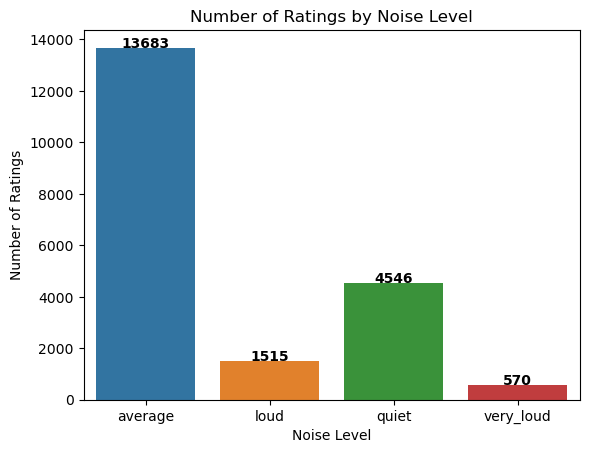

In [7]:
# Plotting sample size
# Compute the length of each list
import seaborn as sns
import matplotlib.pyplot as plt
lengths = grouped_df.apply(len)

# Plot the length on a graph
sns.barplot(x=lengths.index, y=lengths)

# Add y-values on top of each bar
for i, v in enumerate(lengths):
    plt.text(i, v, str(v), ha='center', fontweight='bold')

# Add labels and title
plt.xlabel('Noise Level')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Noise Level')

# Show the plot
plt.show()

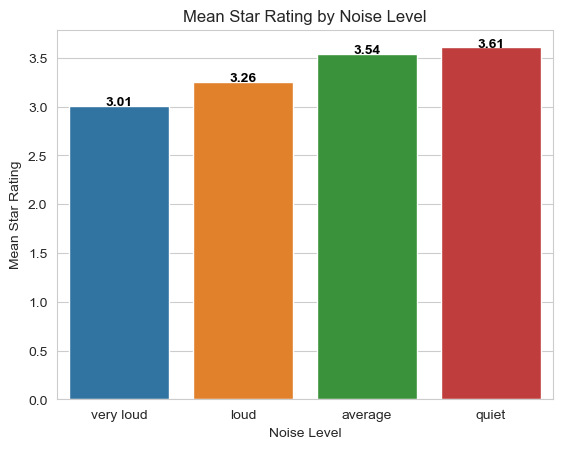

In [8]:
# Plotting bar chart to visualise mean value of each noise level
#Data
noise_levels = ['very loud', 'loud', 'average', 'quiet']
mean_star_ratings = [very_loud_mean_star, loud_mean_star, average_mean_star, quiet_mean_star]

# Set style
sns.set_style('whitegrid')

# Create the plot
ax = sns.barplot(x=noise_levels, y=mean_star_ratings)

# Add labels and title
plt.xlabel('Noise Level')
plt.ylabel('Mean Star Rating')
plt.title('Mean Star Rating by Noise Level')

# Add bar labels
for i, v in enumerate(mean_star_ratings):
    ax.text(i, v, str(round(v,2)), ha='center', color='black', fontweight='bold')

# Show the plot
plt.show()


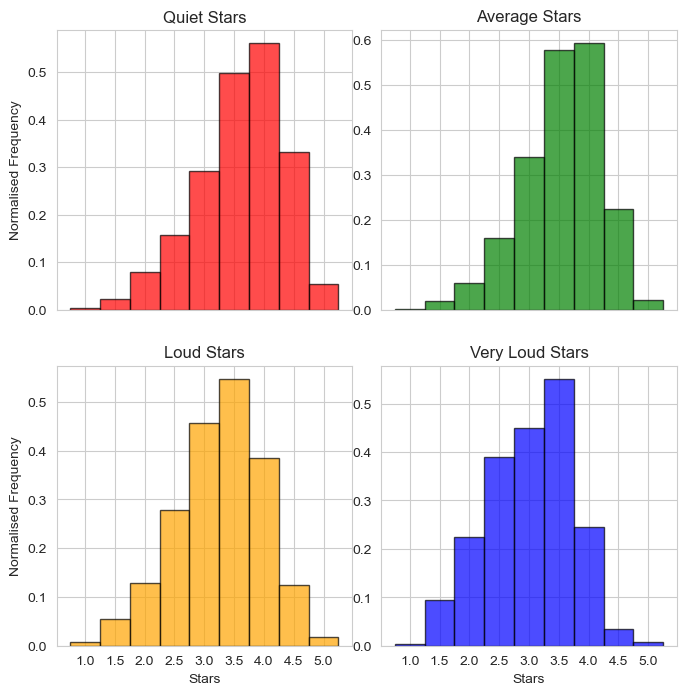

In [9]:
# Plotting distributions
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True)

# Define the bins for the histograms
bins = np.arange(1, 6, 0.5)

# Plot the histograms for each list
axs[0, 0].hist(quiet_stars, bins=bins, edgecolor='black', density=True, color='red', alpha=0.7, align = 'left')
axs[0, 1].hist(average_stars, bins=bins, edgecolor='black', density=True, color='green', alpha=0.7,align = 'left')
axs[1, 0].hist(loud_stars, bins=bins, edgecolor='black', density=True, color='orange', alpha=0.7,align = 'left')
axs[1, 1].hist(very_loud_stars, bins=bins, edgecolor='black', density=True, color='blue', alpha=0.7,align = 'left')

# Set x-axis label for all subplots
for ax in axs[-1, :]:
    ax.set_xlabel('Stars')

# Set y-axis label for all subplots
for ax in axs[:, 0]:
    ax.set_ylabel('Normalised Frequency')

# Set x-axis ticks for all subplots
for ax in axs.flatten():
    ax.set_xticks(np.arange(1, 5.5, 0.5))

# Set title for each subplot
axs[0, 0].set_title('Quiet Stars')
axs[0, 1].set_title('Average Stars')
axs[1, 0].set_title('Loud Stars')
axs[1, 1].set_title('Very Loud Stars')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# Display the plot
plt.show()


In [10]:
# Printing kurtosis and skewness values
print(f'Kurtosis of quiet stars list: {kurtosis(quiet_stars, axis=0, bias=True)}')
print(f'Skewness of quiet stars list: {skew(quiet_stars, axis=0, bias=True)}')
print(f'Variance of quiet stars list: {np.var(quiet_stars, axis=0, ddof=1)}')
print(f'Kurtosis of average stars list: {kurtosis(average_stars, axis=0, bias=True)}')
print(f'Skewness of average stars list: {skew(average_stars, axis=0, bias=True)}')
print(f'Variance of average stars list: {np.var(average_stars, axis=0, ddof=1)}')
print(f'Kurtosis of loud stars list: {kurtosis(loud_stars, axis=0, bias=True)}')
print(f'Skewness of loud stars list: {skew(loud_stars, axis=0, bias=True)}')
print(f'Variance of loud stars list: {np.var(loud_stars, axis=0, ddof=1)}')
print(f'Kurtosis of very loud stars list: {kurtosis(very_loud_stars, axis=0, bias=True)}')
print(f'Skewness of very loud list: {skew(very_loud_stars, axis=0, bias=True)}')
print(f'Variance of very loud stars list: {np.var(very_loud_stars, axis=0, ddof=1)}')


Kurtosis of quiet stars list: 0.1168627874095094
Skewness of quiet stars list: -0.5906947866502676
Variance of quiet stars list: 0.5461512000298138
Kurtosis of average stars list: 0.300732175247048
Skewness of average stars list: -0.5748333193420896
Variance of average stars list: 0.44552845149333953
Kurtosis of loud stars list: -0.12199191091575301
Skewness of loud stars list: -0.34272605365422637
Variance of loud stars list: 0.5479687929162798
Kurtosis of very loud stars list: -0.48123678888705435
Skewness of very loud list: -0.21637402875004416
Variance of very loud stars list: 0.5205569944192643


In [11]:
# Test for normality using the Anderson-Darling test
anderson_stat, anderson_crit, anderson_sig = stats.anderson(average_stars)

# Print the test statistic, critical values, and significance levels
print(f"Anderson-Darling test statistic: {anderson_stat:.4f}")
print(f"Critical values: {anderson_crit}")
print(f"Significance levels: {anderson_sig}")

Anderson-Darling test statistic: 394.4067
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


In [12]:
# Kruskal-Wallis hypothesis testing
# Create a list of star ratings for each noise level
noise_levels = ['average', 'loud', 'quiet', 'very_loud']
stars_by_noise = [average_stars, loud_stars, quiet_stars, very_loud_stars]

# Perform the Kruskal-Wallis test
stat, p = stats.kruskal(*stars_by_noise)

# Print the test statistic and p-value
print(f"Kruskal-Wallis test statistic: {stat}")
print(f"p-value: {p}")

Kruskal-Wallis test statistic: 572.0677657721053
p-value: 1.1441527556326707e-123


In [13]:
# Perform the post-hoc Wilcoxon rank-sum test between specific groups
p1 = stats.ranksums(loud_stars, quiet_stars)[1]
p2 = stats.ranksums(very_loud_stars, quiet_stars)[1]
p3 = stats.ranksums(average_stars, quiet_stars)[1]

# print the results
print("\nWilcoxon rank-sum test results:")
print("Loud vs. Quiet: p-value =", p1)
print("Very Loud vs. Quiet: p-value =", p2)
print("Average vs. Quiet: p-value =", p3)


Wilcoxon rank-sum test results:
Loud vs. Quiet: p-value = 1.405180242748168e-56
Very Loud vs. Quiet: p-value = 4.748822213637461e-66
Average vs. Quiet: p-value = 9.583634912488776e-11
